In [5]:
import pandas as pd
from tqdm.auto import tqdm
from prediction import category_prediction
import warnings
warnings.filterwarnings('ignore')

In [2]:
message = pd.read_csv('./data/features.csv')
message = message.drop(['transactions','oil_price'], axis=1)

message.head()

,date,store_nbr,family,sales,onpromotion,on_holiday,cluster,type
0,2013-01-01,1,AUTOMOTIVE,0.0,0,1,13,D
1,2013-01-01,1,BABY CARE,0.0,0,1,13,D
2,2013-01-01,1,BEAUTY,0.0,0,1,13,D
3,2013-01-01,1,BEVERAGES,0.0,0,1,13,D
4,2013-01-01,1,BOOKS,0.0,0,1,13,D


In [66]:
#To filter
message = message[message.family == 'PRODUCE']
message = message[message.store_nbr == 1]

message.head()

,date,store_nbr,family,sales,onpromotion,on_holiday,cluster,type
30,2013-01-01,1,PRODUCE,0.0,0,1,13,D
63,2013-01-01,10,PRODUCE,0.0,0,1,15,C
96,2013-01-01,11,PRODUCE,0.0,0,1,6,B
129,2013-01-01,12,PRODUCE,0.0,0,1,15,C
162,2013-01-01,13,PRODUCE,0.0,0,1,15,C


In [3]:
#predicting by family
result = pd.DataFrame()
for i in tqdm(list(message.family.unique())):
    tab = message[message.family == i]
    tab = category_prediction(tab)
    result = pd.concat([result, tab], axis=0)
result = result.reset_index(drop=True)

result


  0%|          | 0/33 [00:00<?, ?it/s]

,y_test,y_test_pred,period,store
0,7.838710,8.766170,2017-01,39
1,4.903226,6.513758,2017-01,38
2,5.516129,4.012508,2017-01,37
3,4.774194,2.594411,2017-01,36
4,4.903226,5.281166,2017-01,35
...,...,...,...,...
14251,1.933333,0.983011,2017-08,22
14252,7.763467,17.254350,2017-08,23
14253,25.412467,41.071138,2017-08,24
14254,3.333333,1.919484,2017-08,12


In [4]:
#predicting by store
result = pd.DataFrame()
for i in tqdm(list(message.store_nbr.unique())):
    tab = message[message.store_nbr == i]
    tab = category_prediction(tab)
    result = pd.concat([result, tab], axis=0)
result = result.reset_index(drop=True)

result

  0%|          | 0/54 [00:00<?, ?it/s]

,y_test,y_test_pred,period,store
0,334.114330,306.342472,2017-01,1
1,315.941316,305.671286,2017-02,1
2,350.879670,309.070760,2017-03,1
3,315.308305,310.693167,2017-04,1
4,320.774114,311.061694,2017-05,1
...,...,...,...,...
427,653.070490,563.011223,2017-04,9
428,576.705714,562.255410,2017-05,9
429,561.518286,547.625564,2017-06,9
430,553.231034,546.146315,2017-07,9


In [61]:
#filter for low values 
result = result[(result.y_test > 10)&(result.y_test_pred > 10)]
result

,y_test,y_test_pred,period,store,error
14,18.903226,22.169141,2017-01,44,0.172770
15,17.161290,21.233301,2017-01,45,0.237279
16,15.096774,20.256063,2017-01,46,0.341748
17,14.354839,20.162344,2017-01,47,0.404568
18,11.612903,15.259634,2017-01,48,0.314024
...,...,...,...,...,...
12941,42.652334,57.018243,2017-08,7,0.336814
12942,37.860467,56.133774,2017-08,8,0.482649
12943,19.022867,16.520235,2017-08,9,0.131559
12953,16.471067,11.538683,2017-08,20,0.299457


<Axes: xlabel='period'>

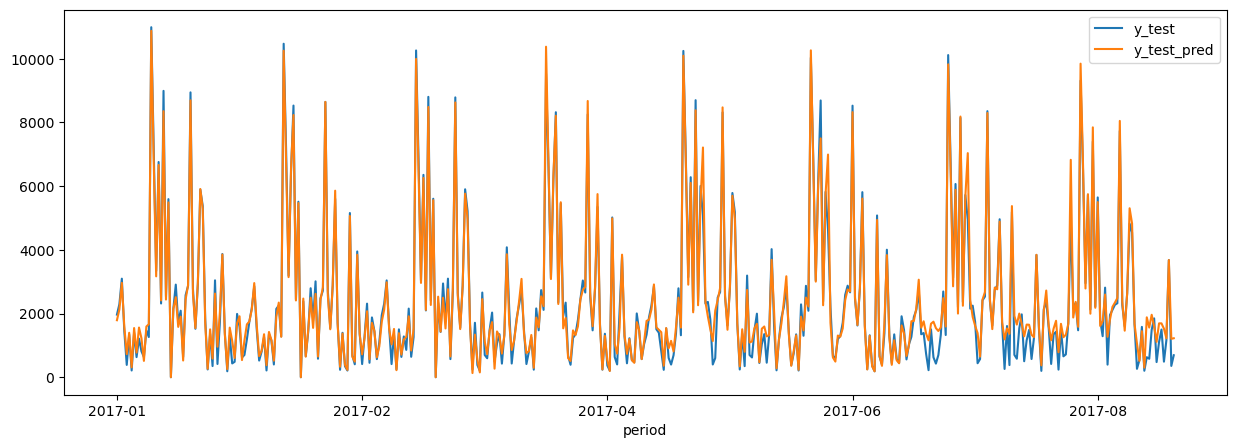

In [68]:
#vizualization
result.plot(x='period', y=['y_test', 'y_test_pred'], figsize=(15,5))

In [69]:
#calculating the percent of error
result = result[result.y_test != 0]
result['error'] = abs(result['y_test'] - result['y_test_pred'])/result['y_test']
result

,y_test,y_test_pred,period,store,error
0,1966.400681,1790.003307,2017-01,39,0.089706
1,2295.005226,2127.882896,2017-01,38,0.072820
2,3094.625645,2963.700368,2017-01,37,0.042307
3,1456.283910,1590.174574,2017-01,36,0.091940
4,387.124935,725.074893,2017-01,35,0.872974
...,...,...,...,...,...
427,488.914867,1523.200515,2017-08,22,2.115472
428,1166.728667,1224.189426,2017-08,23,0.049249
429,3678.951527,3680.342790,2017-08,24,0.000378
430,355.109935,1205.618916,2017-08,12,2.395058


In [70]:
#performance
for i in [0.05, 0.1, 0.15, 0.2]:
    value = len(result[result.error < i])/len(result)
    print('\nModel performace at {}%: {}%'.format(i*100, round(value*100,2)))



Model performace at 5.0%: 40.56%

Model performace at 10.0%: 59.67%

Model performace at 15.0%: 71.56%

Model performace at 20.0%: 76.46%
